In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import NN as nn
import importlib
from IPython.display import display, clear_output
from sklearn import metrics
from sklearn.utils import shuffle
importlib.reload(nn)

<module 'NN' from 'd:\\Work\\Programming\\Jupyter\\Customer Segmentation NN\\NN.py'>

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

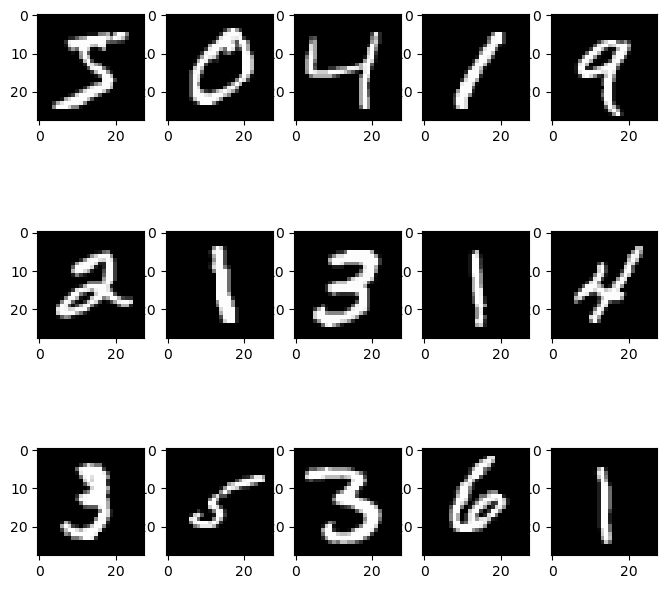

In [30]:
fig, axs = plt.subplots(3, 5, figsize=(8, 8))
img_index = 0
for i in range(3):
    for j in range(5):
        axs[i, j].imshow(x_train[img_index], cmap='gray')
        img_index += 1

In [31]:
# Normalizing the data
x_train = x_train / 255.
x_test = x_test / 255.

In [48]:
num_features = 28 * 28
num_labels = 10
layers = [
    nn.DenseLayer(num_features, 0, nn.dummy_activation, nn.dummy_activation, is_input= True, is_output= False),
    nn.DenseLayer(64, num_features, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 64, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 512, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(64, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(num_labels, 64, nn.sigmoid, nn.sigmoid_prime, is_input = False, is_output= True)
]
learning_rate = 0.01
lamda = 0.03
epochs = 50
batch_size = 256

In [49]:
# Reshaping the data to m, num_features
x_train = np.reshape(x_train, (-1, num_features))
y_train = np.reshape(y_train, (-1, 1))

x_test = np.reshape(x_test, (-1, num_features))
y_test = np.reshape(y_test, (-1, 1))

x_train, y_train = shuffle(x_train, y_train)
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000, 1)), ((10000, 784), (10000, 1)))

In [50]:
history = nn.train(layers, 
            x_train, 
            y_train, 
            num_labels,
            epochs,
            batch_size,
            learning_rate,
            lamda,
            x_test,
            y_test,
            True,
            lambda x: display(x),
            lambda: clear_output(wait= True)
            )

'Epoch: 22 -> Loss: 0.32, Validation Loss: 0.32'

 46%|████▌     | 23/50 [17:25<20:27, 45.44s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "d:\Applications\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\asimw\AppData\Local\Temp\ipykernel_16020\2325910061.py", line 1, in <module>
    history = nn.train(layers,
  File "d:\Work\Programming\Jupyter\Customer Segmentation NN\NN.py", line 175, in train
    backward_propagate(layers, batch_y, alpha, lamda, num_labels, caches, False)
  File "d:\Work\Programming\Jupyter\Customer Segmentation NN\NN.py", line 70, in backward_propagate
    dW = (1 / m) * np.dot(A.T, dZ_next).T
  File "<__array_function__ internals>", line 180, in dot
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\Applications\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "d:\Applicat

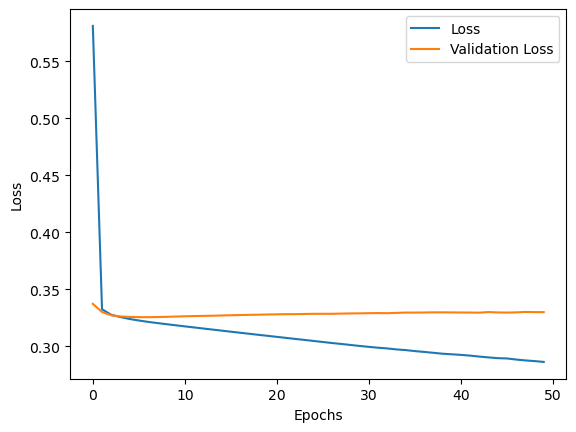

In [44]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

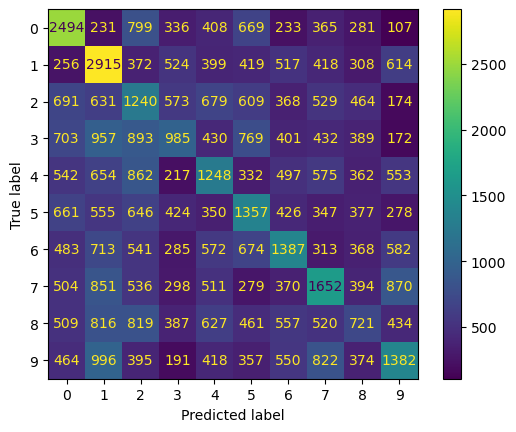

In [45]:
raw_predictions, caches = nn.forward_propagate(layers, x_train)
predictions = np.argmax(raw_predictions, 1)
actual = y_train
confusion_matrix = metrics.confusion_matrix(actual, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()